<a href="https://colab.research.google.com/github/Surajkr1166/Infosys-SpringBoard-Internship/blob/Task-1/RAFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

In [2]:
# Upload the dataset
uploaded = files.upload()


Saving credit_underwriting_data.csv to credit_underwriting_data (3).csv


In [3]:
#read the dataset
data = pd.read_csv('credit_underwriting_data.csv')

In [4]:
# Replace NaN values with a suitable integer (e.g., 0 or -1) before converting to int
data['Credit Score'] = data['Credit Score'].fillna(0).astype(int)
data['Applicant_Age'] = data['Applicant_Age'].fillna(0).astype(int)
data['Loan_Term(years)'] = data['Loan_Term(years)'].fillna(0).astype(int)
data['Income(USD)'] = data['Income(USD)'].fillna(0).astype(int)



In [5]:
# Handle missing values by filling them with the median
data.fillna(data.median(numeric_only=True), inplace=True)

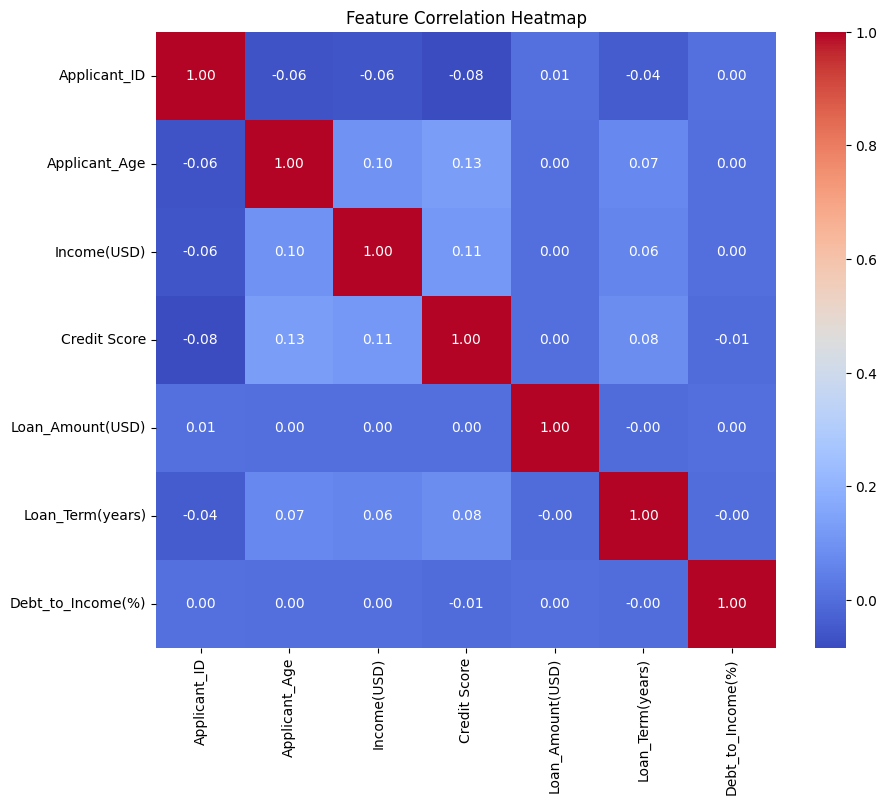

In [6]:
# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=np.number).columns
numerical_data = data[numerical_features]

# Heatmap to visualize feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
#spliting features(x) and target(y)
X=data.drop(['Credit Score'],axis=1)
y=data['Credit Score']


In [8]:
#encode categorical variables
X=pd.get_dummies(X)



In [9]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)




In [10]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#initialize the random forest
clf = RandomForestClassifier(n_estimators=200 , random_state=42)
#train the classifier
clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Confusion matrix for training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Output confusion matrices
print("Confusion Matrix - Training Data:\n", cm_train)
print("Confusion Matrix - Test Data:\n", cm_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy
print("Accuracy on the training set: {:.3f}".format(train_accuracy))
print("Accuracy on the test set: {:.3f}".format(test_accuracy))

# Classification report for the test set
print("The classification report is as follows:")
print(classification_report(y_test, y_test_pred))